In [54]:
import sys
import os

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np
import itertools as it

sys.path.append(os.getcwd())
from load_data import *
from plotting_tools import *

sys.path.append('../3_score/')
from optimize import Scores

/share/PI/rondror/software/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [97]:
data = '/scratch/PI/rondror/docking_data'
u_lig = lambda x:len(os.listdir('{}/{}/final_ligands'.format(data, x)))
all_datasets = ['pdbbind_combo/{}'.format(s) for s in os.listdir('{}/pdbbind_combo'.format(data))]
all_datasets.sort(key=lambda x: -u_lig(x))
all_datasets = list(filter(lambda x: u_lig(x) >= 15, all_datasets))

grids = load_grids()

In [81]:
all_datasets = ['B1AR_all']
grids = {'B1AR_all':os.listdir('/scratch/PI/rondror/docking_data/{}/final_ligands'.format(all_datasets[0]))}
grids = {r:[i.split('_')[0] for i in grids[r]] for r in grids}

In [99]:
all_loaded_data = {r:{} for r in all_datasets}
        
for receptor in all_datasets:
    for i, s in enumerate(grids[receptor][:1]):
        (xcrystals, xglides) = load_data(receptor, s,
                                         w=[0,0,1,1,1,0.5,1,1,1,0.02,0,0,0],
                                         glide_ifp='xglide8', crystal_ifp='xcrystal8')
        if i == 0:
            all_loaded_data[receptor]['xcrystals'] = xcrystals
        all_loaded_data[receptor][s] = xglides

In [103]:
all_scores = {r: {s:load_combinations(r, s, 'scoring_output') for s in all_loaded_data[r]} 
              for r in all_loaded_data}

In [102]:
all_scores = {r: {grids[r][0]: Scores(all_loaded_data[r][grids[r][0]], all_loaded_data[r]['xcrystals'], 
                            all_loaded_data[r][grids[r][0]].keys(), grids[r][0], 25, gscore_weight=2.7)}
             for r in all_loaded_data}

KeyboardInterrupt: 

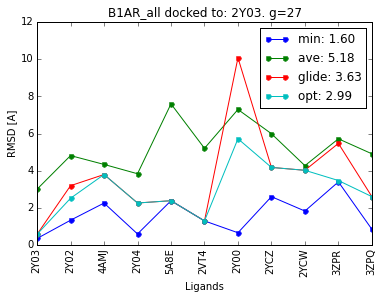

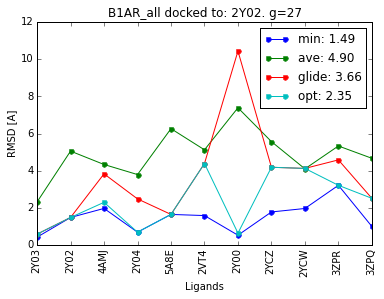

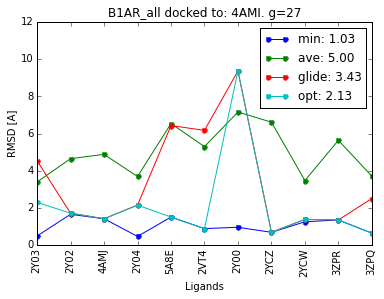

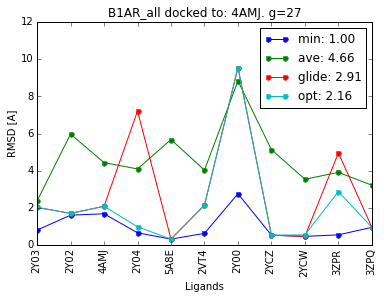

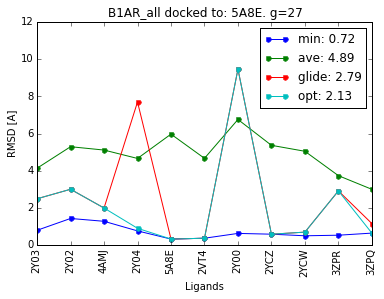

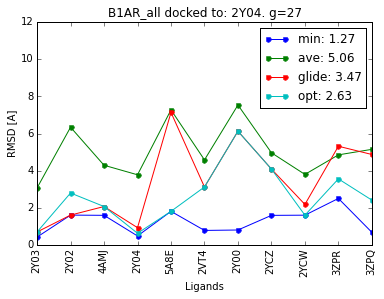

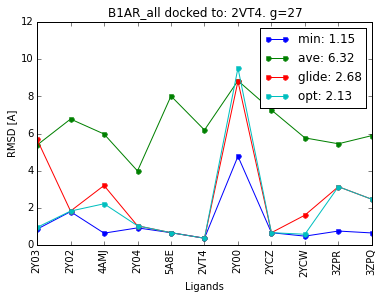

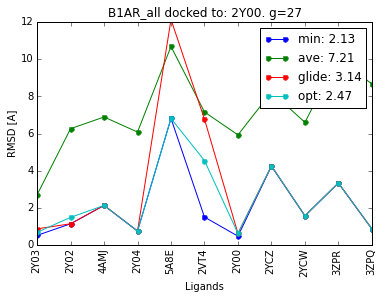

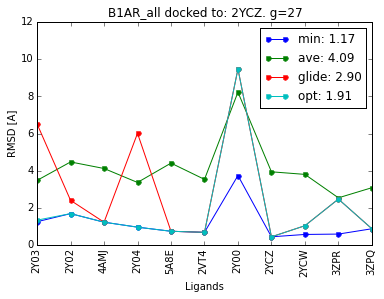

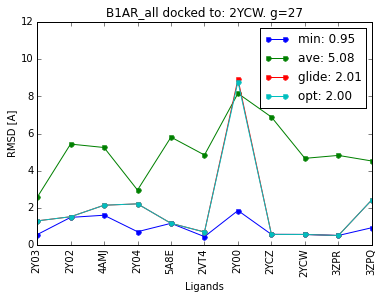

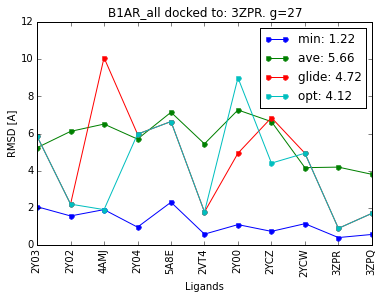

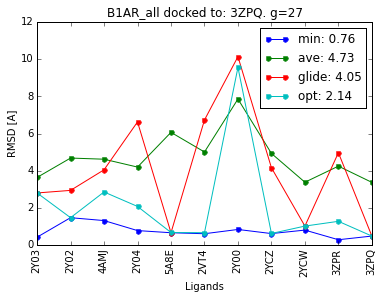

In [87]:
get_ipython().magic(u'matplotlib inline')
us_rmsds = []
glide_rmsds = []
for r in all_scores:
    for s in all_scores[r]:
        title = '{} docked to: {}. g={}'.format(r, s, 27)
        final_rmsds = plot_final_rmsds(all_scores[r][s], title)
        us_rmsds.extend([all_scores[r][s].get_top_rmsd(l, 1, False) for l in all_scores[r][s].ligands])
        glide_rmsds.extend([all_scores[r][s].get_top_rmsd(l, 1, True) for l in all_scores[r][s].ligands])

In [107]:
print all_scores['pdbbind_combo/P00918']['1BCD'].keys()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]


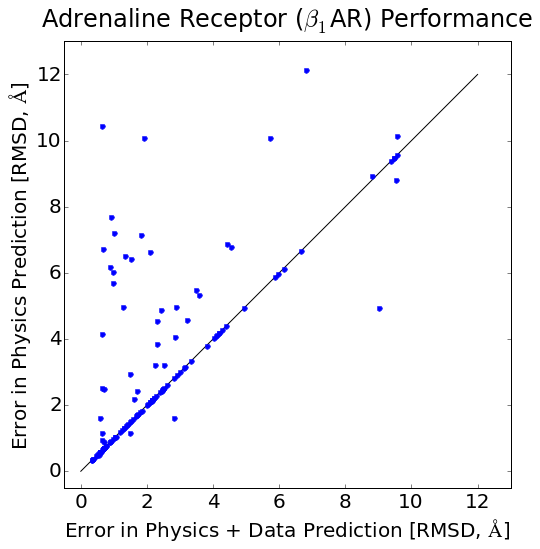

In [96]:
fig = plt.figure(figsize=(8,8))
plt.rc('font', weight='normal')

plt.plot([0,12],[0,12],'k')
plt.plot(us_rmsds, glide_rmsds, '.', markersize=10)
plt.axis([-0.5, 13, -0.5, 13])

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

#fig = plt.figure(figsize=(4, 5), dpi=100)

ax.set_aspect('equal')#abs(x1-x0)/abs(y1-y0))
plt.xlabel('Error in Physics + Data Prediction [RMSD, $\AA$]', size=20)
plt.ylabel('Error in Physics Prediction [RMSD, $\AA$]', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Adrenaline Receptor ($\\beta_1$AR) Performance', size=24)
plt.show()

In [121]:
get_ipython().magic(u'matplotlib inline')

def cluster_rmsd(ligs, poses, glides, f=np.mean):
    assert len(ligs) == len(poses)
    return f([glides[l].poses[poses[i]].rmsd for i, l in enumerate(ligs)])

all_perf = {'u-ave':[],'g-ave':[],'u-med':[],'g-med':[],'u-success':[],'g-success':[],'n':[]}

for receptor in sorted(all_scores.keys(), key=lambda x: -u_lig(x)):
    for s in grids[receptor][:1]:
        #(xcrystals, xglides) = load_data(receptor, s,
        #                                 w=[0,0,10,10,10,5,10,10,10,0.2,0,0,0],
        #                                 glide_ifp='xglide8',
        #                                 crystal_ifp='xcrystal8')
        xcrystals = all_loaded_data[receptor]['xcrystals']
        xglides = all_loaded_data[receptor][s]
        tr = {1:[xglides[l].poses[0].rmsd for l in xglides.keys() if l != s]}
        print receptor, s
        print all_scores[receptor][s].keys()
        if all_scores[receptor][s] == {}: continue
        k = max(all_scores[receptor][s].keys())
        assert len(all_scores[receptor][s][k]) == 1
        
        our_ligs, our_poses = all_scores[receptor][s][k].items()[0]
        glide_poses = tuple([0 for i in our_ligs])
        
        all_perf['u-ave'].append(cluster_rmsd(our_ligs, our_poses, xglides, f=np.mean))
        all_perf['g-ave'].append(cluster_rmsd(our_ligs, glide_poses, xglides, f=np.mean))
        
        all_perf['u-med'].append(cluster_rmsd(our_ligs, our_poses, xglides, f=np.median))
        all_perf['g-med'].append(cluster_rmsd(our_ligs, glide_poses, xglides, f=np.median))
        
        def success(rmsd_list):
            return sum([1 for i in rmsd_list if i <= 2])/float(len(rmsd_list))
        
        all_perf['u-success'].append(cluster_rmsd(our_ligs, our_poses, xglides, f=success))
        all_perf['g-success'].append(cluster_rmsd(our_ligs, glide_poses, xglides, f=success))
        
        all_perf['n'].append(k)
        
        #for k in sorted(all_scores[receptor][s].keys()):
        #    for ligs, poses in all_scores[receptor][s][k].items():
            #print len(combo), np.mean([scores.get_top(l, 1, False) for l in combo])
        #        if k not in tr:
        #            tr[k] = []
        #        tr[k].append(cluster_rmsd(ligs, poses, xglides))

        #plt.plot([c for c, r in tr.items()], [np.mean(r) for c, r in tr.items()], '*-k', markersize=5)
        #max_y = 0
        #for combo_size, rmsds in tr.items():
        #    max_y = max(max(rmsds), max_y)
        #    plt.plot([combo_size], [np.mean(rmsds)], '*k', markersize=10)
        #    plt.plot([combo_size]*len(rmsds), rmsds, '.', markersize=5)
            #break
        #plt.title('{}: {}'.format(receptor, s))
        #plt.xlabel('Number of ligands')
        #plt.ylabel('RMSD')
        #plt.axis([0,max(tr.keys())+1, 0, max_y+1])
        #plt.show()


pdbbind_combo/P00918 1BCD
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
pdbbind_combo/P00760 2TPI
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 

In [17]:
print all_scores[receptor][s][k].items()

[(('1M2P', '1M2R', '1OM1', '1ZOE', '1ZOG', '1ZOH', '2OXD', '2OXX', '2OXY', '2PVH', '2PVJ', '2PVK', '2PVL', '2PVM', '3BE9', '3FL5', '3PWD'), (1, 0, 0, 5, 3, 0, 2, 0, 0, 0, 0, 0, 7, 0, 0, 0, 1))]


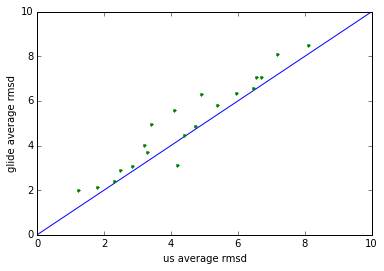

In [126]:
get_ipython().magic(u'matplotlib inline')

num = 20

#for i in range(len(all_perf['n'])):
#for i in range(2):
plt.plot([0,10],[0,10])
#plt.plot([r for j, r in enumerate(all_perf['u-ave']) if j%2 == i], 
#         [r for j, r in enumerate(all_perf['g-ave']) if j%2 == i], '.')
plt.plot(all_perf['u-ave'][:num], all_perf['g-ave'][:num], '.')
plt.xlabel('us average rmsd')
plt.ylabel('glide average rmsd')
#plt.title(i)
plt.show()

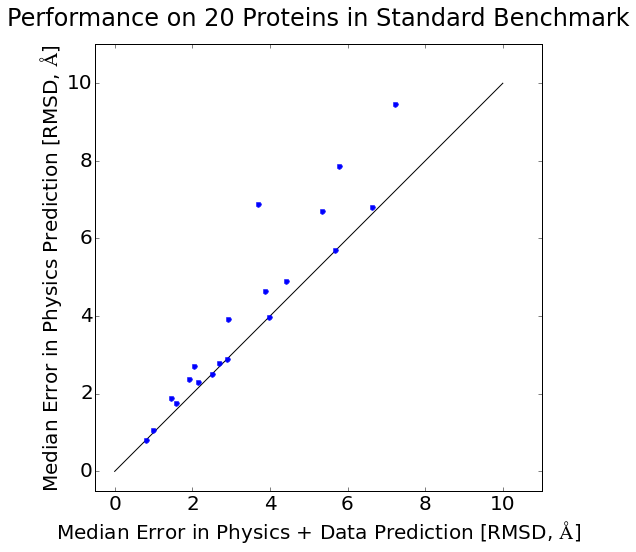

In [136]:
get_ipython().magic(u'matplotlib inline')

fig = plt.figure(figsize=(8,8))
plt.rc('font', weight='normal')

#plt.plot([0,12],[0,12],'k')
#plt.plot(us_rmsds, glide_rmsds, '.', markersize=10)
plt.axis([-0.5, 11, -0.5, 11])

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.03])

#fig = plt.figure(figsize=(4, 5), dpi=100)

ax.set_aspect('equal')#abs(x1-x0)/abs(y1-y0))
plt.xlabel('Median Error in Physics + Data Prediction [RMSD, $\AA$]', size=20)
plt.ylabel('Median Error in Physics Prediction [RMSD, $\AA$]', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Performance on 20 Proteins in Standard Benchmark', size=24)
#plt.show()

#for i in range(len(all_perf['n'])):
#for i in range(2):
plt.plot([0,10],[0,10],'k')
#    plt.plot([r for j, r in enumerate(all_perf['u-med']) if j%2 == i], 
#             [r for j, r in enumerate(all_perf['g-med']) if j%2 == i], '.')
#for j in range(num):
plt.plot(all_perf['u-med'][:num], all_perf['g-med'][:num], '.', markersize=10)#all_perf['n'][j])
#plt.xlabel('us median rmsd')
#plt.ylabel('glide median rmsd')
#    plt.title(i)
plt.show()

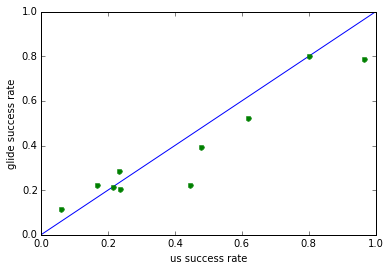

In [120]:
get_ipython().magic(u'matplotlib inline')
#for i in range(len(all_perf['n'])):
#for i in range(2):
plt.plot([0,1],[0,1])
#    plt.plot([r for j, r in enumerate(all_perf['u-success']) if j%2 == i], 
#             [r for j, r in enumerate(all_perf['g-success']) if j%2 == i], '.')
plt.plot(all_perf['u-success'][:10], all_perf['g-success'][:10], '.', markersize=10)
plt.xlabel('us success rate')
plt.ylabel('glide success rate')
#    plt.title(i)
plt.show()